Event Driven Simulation 

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Scheduling CoMP
---------

In [1]:
import eds
import simpy
import numpy as np
import pandas as pd
SCHEDULE_T=2
import matplotlib.pyplot as plt


In [2]:
#df2=pd.read_csv('C2-pi-2-noOH-Copy1')

In [3]:
env=simpy.Environment()
#env = simpy.rt.RealtimeEnvironment(factor=1/10)

ue_list=np.array([])
ue_list2=np.array([])
#define UEs

    
max_prb=50
thr=6
cluster=[19,20]

ue_nr=50

x=np.append(np.ones(ue_nr)*19,np.ones(ue_nr)*20)
y=np.append(np.ones(ue_nr)*20,np.ones(ue_nr)*19)
sinr=np.random.randint(0,12,ue_nr*2)
sinr2=np.random.randint(2,16,ue_nr*2)
rt_nrt=np.array([])
rt_nrt=np.append(rt_nrt,np.ones(ue_nr*2)*0)

df=pd.DataFrame()
df['PCI Serving']=x
df['PCI Coord']=y
df['JT_1 SINR [lin]']=sinr
df['JT_2 SINR [lin]']=sinr2
df['usage']=rt_nrt
df['id']=np.arange(0,ue_nr*2)
   
df['PCI Serving']=df['PCI Serving'].astype('int')
df['PCI Coord']=df['PCI Coord'].astype('int')

df['JT_1 SINR [lin]']=df['JT_1 SINR [lin]'].astype('int')
df['JT_2 SINR [lin]']=df['JT_2 SINR [lin]'].astype('int')

In [4]:
ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env))

        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS\eds.py:156: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:186: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


In [5]:
ue_list=ue_dict[19]

In [6]:
ue_all[60].mon

{2: 0,
 4: 0,
 6: 0,
 8: 0,
 10: 0,
 12: 0,
 14: 0,
 16: 0,
 18: 0,
 20: 0,
 22: 0,
 24: 0,
 26: 0,
 28: 0,
 30: 0,
 32: 0,
 34: 0,
 36: 0,
 38: 0,
 40: 0,
 42: 0,
 44: 0,
 46: 0,
 48: 0,
 50: 0,
 52: 0,
 54: 0,
 56: 0,
 58: 0,
 60: 0,
 62: 0,
 64: 0,
 66: 0,
 68: 0,
 70: 0,
 72: 0,
 74: 0,
 76: 0,
 78: 0,
 80: 0,
 82: 0,
 84: 0,
 86: 0,
 88: 1600,
 90: 1600,
 92: 700.0,
 94: 700.0,
 96: 700.0,
 98: 700.0,
 100: 466.0,
 102: 268.0,
 104: 268.0,
 106: 268.0,
 108: 1868.0,
 110: 1868.0,
 112: 1868.0,
 114: 1562.0,
 116: 1562.0,
 118: 1562.0,
 120: 1562.0,
 122: 1562.0,
 124: 1562.0,
 126: 1562.0,
 128: 3162.0,
 130: 3162.0,
 132: 3162.0,
 134: 3162.0,
 136: 3162.0,
 138: 3162.0,
 140: 3162.0,
 142: 3162.0,
 144: 3162.0,
 146: 3162.0,
 148: 4762.0,
 150: 4762.0,
 152: 4762.0,
 154: 4762.0,
 156: 4762.0,
 158: 4762.0,
 160: 4762.0,
 162: 4564.0,
 164: 4564.0,
 166: 4564.0,
 168: 6164.0,
 170: 6164.0,
 172: 6164.0,
 174: 6164.0,
 176: 6164.0,
 178: 6164.0,
 180: 6164.0,
 182: 6164.0,
 184: 

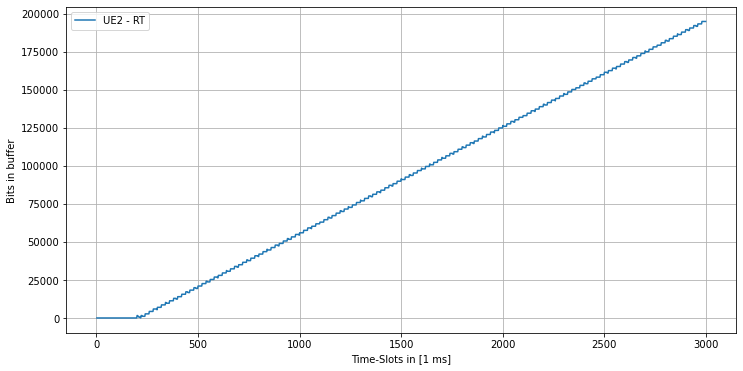

In [7]:

plt.figure(figsize=(12,6))
#plt.plot(list(ue_all[20].mon.keys())[1000:3000],list(ue_all[20].mon.values())[1000:3000],label='UE1 - RT')
plt.plot(list(ue_all[9].mon.keys()),list(ue_all[9].mon.values()),label='UE2 - RT')
#plt.plot(list(ue_all[45].mon.keys()),list(ue_all[45].mon.values()),label='UE3 - RT')
#plt.plot(list(ue_list[120].mon.keys())[1000:3000],list(ue_list[120].mon.values())[1000:3000],label='UE4')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')

In [8]:
df=eds.ue_to_df(ue_all[0:49])

In [9]:
df

,mr,mr2,queue,queue2,tbs,tbs2,comp,sinr1,sinr2,sinr-gain,qos,mr-Mon,mr2-Mon,bit,bits
0,15.829208,38.269533,178200.00,111075.00,34.00,105.00,1,3.0,11.0,8.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...",47400.00,0.00
1,13.560159,12.109309,188200.00,192542.00,26.00,77.50,0,2.0,8.0,6.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...",40600.00,36258.00
2,28.556481,25.451179,144900.00,154195.00,77.50,88.75,0,8.0,9.0,1.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...",85500.00,76205.00
3,11.463312,10.405468,192876.00,196042.00,18.00,66.25,0,1.0,7.0,6.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...",34324.00,31158.00
4,19.971591,18.134412,167400.00,172900.00,50.00,100.00,0,5.0,10.0,5.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...",59800.00,54300.00
5,20.472197,18.134367,165900.00,172900.00,50.00,50.00,0,5.0,5.0,0.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...",61300.00,54300.00
6,36.499160,33.143577,129205.00,139260.00,105.00,26.00,0,11.0,2.0,-9.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...",109195.00,99140.00
7,25.251101,22.801654,162855.00,170198.75,66.25,66.25,0,7.0,7.0,0.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...",75545.00,68201.25
8,25.945310,23.171770,155925.00,164226.25,66.25,66.25,0,7.0,7.0,0.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...",77675.00,69373.75
9,9.717808,8.872782,194900.00,197430.00,10.00,50.00,0,0.0,5.0,5.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...",29100.00,26570.00


In [11]:
av=0
for i in ue_all:
    av+=i.mR2/i.mR
av=av/(ue_nr*2)
print('CoMP-gain',av)

CoMP-gain 1.6135033429565757


In [ ]:
plt.plot()

In [49]:
print('comp prb perc',prb_number_comp/(prb_number_normal+prb_number_comp))
print('comp user perc',len(ue_comp)/len(ue_all))

comp prb perc 0.3
comp user perc 0.23


In [16]:
x=df.iloc[18]['mr-Mon']

In [24]:
x[2990]

7.719705364039698